<a href="https://colab.research.google.com/github/ds4geo/ds4geo/blob/master/WS%202020%20Course%20Notes/Session%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 7 - Data Exploration - 18th November 2020**

# Part 7.1 - Warm-up Excercise - *Workshop*
Calculate the average value of the data in the following csv file:

***link***


# Part 7.2 - Weather Assignment Review - *Discussion*

* General comments
* specific example of plotting by year - mention group-by
* Discussion about narative and story-telling
* "How do I do that?"

# Part 7.3 - Weather Assignment Part 2

# Part 7.4 - Interactive Data Exploration Excercise - *Discussion/Walkthrough*

We will explore the HydroLakes (https://www.hydrosheds.org/pages/hydrolakes) dataset containing 

1. averages warm-up excercise - 3-5 datasets
2. Weather assignment review
3. "how do I do that"?
4. lake data colab walkthrough
 for advanced: 

 * n legs
 * 

 Data storytelling?

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
root = "https://github.com/ds4geo/ds4geo/blob/master/data/geospatial/HydroLakes/HydroLAKES_points_v10_chunk{}.csv?raw=true"

dl = []
for j in range(28+1):
  tmp = pd.read_csv(root.format(j))
  dl.append(tmp)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
dat = pd.concat(dl)

In [37]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427688 entries, 0 to 27687
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1427688 non-null  int64  
 1   Hylak_id    1427688 non-null  int64  
 2   Lake_name   3022 non-null     object 
 3   Country     1427688 non-null  object 
 4   Continent   1427688 non-null  object 
 5   Poly_src    1427688 non-null  object 
 6   Lake_type   1427688 non-null  int64  
 7   Grand_id    1427688 non-null  int64  
 8   Lake_area   1427688 non-null  float64
 9   Shore_len   1427688 non-null  float64
 10  Shore_dev   1427688 non-null  float64
 11  Vol_total   1427688 non-null  float64
 12  Vol_res     1427688 non-null  float64
 13  Vol_src     1427688 non-null  int64  
 14  Depth_avg   1427688 non-null  float64
 15  Dis_avg     1427688 non-null  float64
 16  Res_time    1427688 non-null  float64
 17  Elevation   1427688 non-null  int64  
 18  Slope_100   1427688 non-

In [38]:
dat.describe()

,Unnamed: 0,Hylak_id,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
count,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06,1.427688e+06
mean,7.138435e+05,7.138445e+05,1.004838e+00,1.619420e+01,2.049974e+00,5.366658e+00,1.712527e+00,1.315877e+02,4.196455e+00,2.994918e+00,3.890146e+00,2.230522e-01,1.790179e+03,2.776025e+02,2.900727e+00,6.682707e+02,-4.933745e+01,5.420002e+01,5.420002e+01,-4.933745e+01
std,4.121382e+05,4.121382e+05,7.048819e-02,2.705994e+02,3.451195e+02,3.917571e+01,7.399161e-01,6.952035e+04,4.314059e+02,7.367804e-02,4.022770e+00,4.819685e+02,1.505887e+04,3.960910e+02,3.169856e+00,2.126908e+04,8.334401e+01,2.144192e+01,2.144192e+01,8.334401e+01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e-01,1.120000e+00,1.010000e+00,5.000000e-02,0.000000e+00,1.000000e+00,1.000000e-01,-9.999000e+03,-9.999000e+03,-4.150000e+02,-1.000000e+00,-9.999000e+03,-1.799925e+02,-5.586088e+01,-5.586088e+01,-1.799925e+02
25%,3.569218e+05,3.569228e+05,1.000000e+00,0.000000e+00,1.400000e-01,1.930000e+00,1.270000e+00,4.100000e-01,0.000000e+00,3.000000e+00,2.300000e+00,5.000000e-03,9.010000e+01,6.500000e+01,1.040000e+00,8.000000e-01,-1.039688e+02,5.184728e+01,5.184728e+01,-1.039687e+02
50%,7.138435e+05,7.138445e+05,1.000000e+00,0.000000e+00,2.400000e-01,2.680000e+00,1.510000e+00,7.800000e-01,0.000000e+00,3.000000e+00,3.300000e+00,2.300000e-02,4.292000e+02,2.050000e+02,1.980000e+00,2.900000e+00,-7.781979e+01,5.999296e+01,5.999296e+01,-7.781979e+01
75%,1.070765e+06,1.070766e+06,1.000000e+00,0.000000e+00,5.100000e-01,4.380000e+00,1.910000e+00,1.900000e+00,0.000000e+00,3.000000e+00,4.500000e+00,1.390000e-01,1.588600e+03,3.760000e+02,3.600000e+00,1.640000e+01,8.579836e+00,6.621850e+01,6.621850e+01,8.579837e+00
max,1.427687e+06,1.427688e+06,3.000000e+00,6.824000e+03,3.770019e+05,1.582937e+04,5.351000e+01,7.560000e+07,2.048000e+05,3.000000e+00,7.387000e+02,1.618056e+05,1.320379e+07,5.813000e+03,5.559000e+01,4.323652e+06,1.799988e+02,8.357118e+01,8.357118e+01,1.799988e+02


In [39]:
dat.sort_values("Lake_area", inplace=True, ascending=False)
dat.head(10)

,Unnamed: 0,Hylak_id,Lake_name,Country,Continent,Poly_src,Lake_type,Grand_id,Lake_area,Shore_len,Shore_dev,Vol_total,Vol_res,Vol_src,Depth_avg,Dis_avg,Res_time,Elevation,Slope_100,Wshd_area,Pour_long,Pour_lat,Cent_lat,Cent_long
0,0,1,Caspian Sea,Russia,Europe,SWBD,1,0,377001.91,15829.37,7.27,75600000.0,0.0,1,200.5,8110.642,107883.0,-29,-1.0,1404108.0,47.717708,45.591934,45.591934,47.717708
4,4,5,Superior,United States of America,North America,SWBD,1,0,81843.92,5248.36,5.18,12004000.0,0.0,1,146.7,2869.953,48410.3,179,-1.0,209219.5,-84.460547,46.468593,46.468593,-84.460547
15,15,16,Victoria,Uganda,Africa,SWBD,3,4492,67166.22,7422.44,8.08,2760000.0,204800.0,1,41.1,1735.515,18406.3,1134,-1.0,265372.8,33.193791,0.430999,0.430999,33.193791
7,7,8,Huron,United States of America,North America,SWBD,1,0,59399.30,8856.64,10.25,3550000.0,0.0,1,59.8,9162.152,4484.5,175,-1.0,576017.7,-82.422576,42.999403,42.999403,-82.422576
5,5,6,Michigan,United States of America,North America,SWBD,1,0,57726.84,2862.67,3.36,4860000.0,0.0,1,84.2,1877.753,29956.0,175,-1.0,176006.4,-84.753910,45.822916,45.822916,-84.753910
16,16,17,Tanganyika,Democratic Republic of the Congo,Africa,SWBD,1,0,32826.65,2126.23,3.31,18940000.0,0.0,1,577.0,1490.748,147049.0,767,-1.0,239411.9,29.185417,-5.911180,-5.911180,29.185417
10,10,11,Baikal,Russia,Europe,SWBD,3,5058,31967.85,2688.05,4.24,23615000.0,46000.0,1,738.7,1997.895,136804.9,449,-1.0,569176.2,104.321875,52.234393,52.234393,104.321875
1,1,2,Great Bear,Canada,North America,CanVec,1,0,30450.64,5331.72,8.62,2200000.0,0.0,1,72.2,535.187,47577.7,145,-1.0,147665.4,-123.505546,65.138384,65.138384,-123.505546
17,17,18,Malawi,Malawi,Africa,SWBD,1,0,29544.00,1718.97,2.82,7720000.0,0.0,1,261.3,1119.676,79801.5,476,-1.0,128727.2,35.236458,-14.417702,-14.417702,35.236458
2,2,3,Great Slave,Canada,North America,CanVec,1,0,26734.29,9814.16,16.93,1580000.0,0.0,1,59.1,4350.692,4203.2,148,-1.0,995312.3,-117.617115,61.311727,61.311727,-117.617115


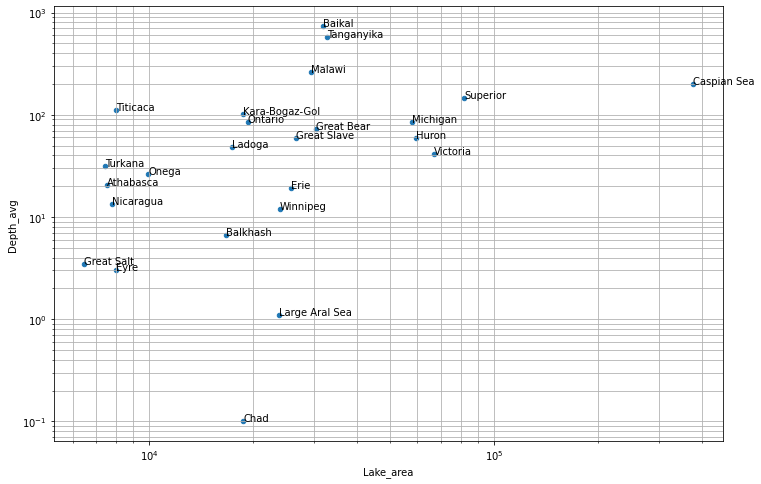

In [40]:
# plot of top 25 lakes, area vs depth, with labels
fig, ax = plt.subplots(figsize=(12,8))
dat.head(25).plot.scatter("Lake_area", "Depth_avg",ax=ax)

ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(which="both")
for i, lake in dat.head(25).iterrows():
  ax.annotate(lake.Lake_name, (lake.Lake_area, lake.Depth_avg))

In [41]:
dat.Lake_area.min()

0.1

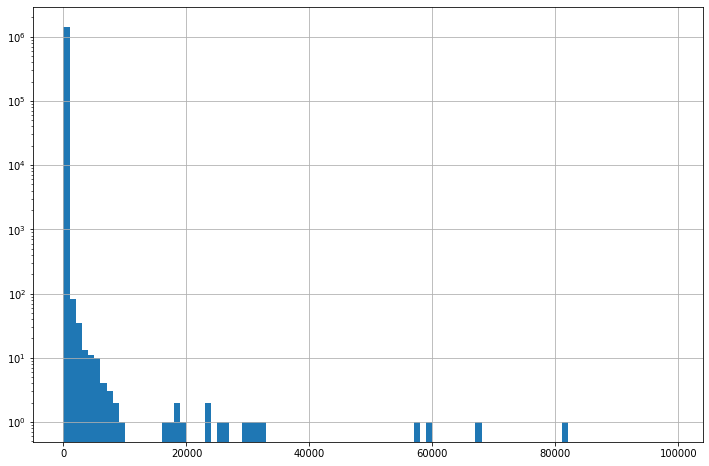

In [42]:
fig, ax = plt.subplots(figsize=(12,8))
dat.Lake_area.hist(ax=ax, bins=np.arange(0,100000,1000))
ax.set_yscale("log")


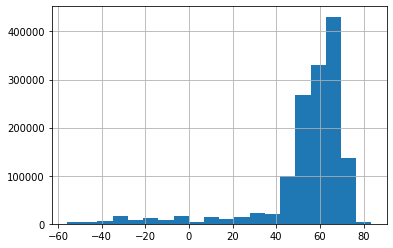

In [43]:
dat.Cent_lat.hist(bins=20)


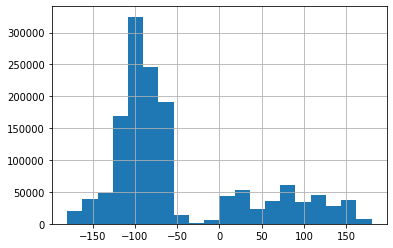

In [44]:
dat.Cent_long.hist(bins=20)

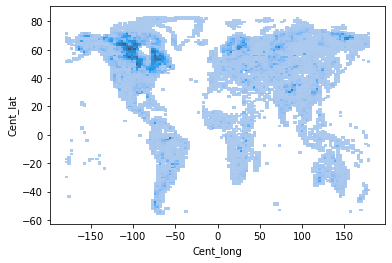

In [51]:
sns.histplot(data=dat.tail(len(dat)-100), x="Cent_long", y="Cent_lat", weights="Lake_area", bins=120)

# TODO

# To Do

* Student assignment submissions link.
* Univariate stats mini-lecture & notes
* Data story telling mini-lecture * notes
* Lake workshop



**Other**
* include crosstab? more pandas - add columns, etc.?
* Submission method
* References


* Create separate solutions notebook
* Enable output cells
* Final go-through and checks
* Workshop timings

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 5 - Data Story Telling - 4th November 2020**

Weather assignment discuss

Simple stats, mean --> kde

Data story telling

How do I do that open workshop

Assignment: weather 2

# Part 5.1 - Weather data assignment review - *Discussion*
We will look at the assignment submissions and discuss the conclusions (what is the weather like in these cities?) and the effectiveness of the analysis, visualisations and story-telling.

# Part 5.2 - Statistics: Describing data part 1 - *Workshop*
It is useful to be able to describe datasets statistically to summarise their properties.

You are provided with 4 small datasets each containing 2 variables (x and y). Describe the datasets by simple statistics (e.g. mean, range, linear regression/correlation coefficient - see if Scipy has a useful function).

**Do not plot the data or closely inspect the individual data points** (we will do this later).

On the basis of the statistics, comment on these datasets.

In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
'''
Load the data from here: "/content/sample_data/anscombe.json"
format is json - find a pandas function to load it
'''

'\nLoad the data from here: "/content/sample_data/anscombe.json"\nformat is json - find a pandas function to load it\n'

In [ ]:
'''# The 4 datasets are in the same json file (and therefore loaded Pandas DataFrame)
They can be distinguished by a column called "Series" with values: ["I", "II", "III", "IV"]
In Pandas, you can select e.g. all the rows of Series I as follows:
dat.loc[dat.Series=="I"]
'''


'# The 4 datasets are in the same json file (and therefore loaded Pandas DataFrame)\nThey can be distinguished by a column called "Series" with values: ["I", "II", "III", "IV"]\nIn Pandas, you can select e.g. all the rows of Series I as follows:\ndat.loc[dat.Series=="I"]\n'

In [ ]:
### ANSWERS
import pandas as pd
from scipy import stats
dat = pd.read_json("/content/sample_data/anscombe.json")
# Select one of the datasets:
series_names = ["I", "II", "III", "IV"]
for n in series_names:
  print(dat.loc[dat.Series==n].mean()) # same for std, max, min, etc.
  sdat = dat.loc[dat.Series==n]
  print(stats.linregress(sdat.X, sdat.Y))

X    9.0
Y    7.5
dtype: float64
LinregressResult(slope=0.5002727272727273, intercept=2.9975454545454543, rvalue=0.81618645422891, pvalue=0.0021813202598156855, stderr=0.11804977471937325)
X    9.000000
Y    7.500909
dtype: float64
LinregressResult(slope=0.5000000000000001, intercept=3.000909090909089, rvalue=0.816236506000243, pvalue=0.0021788162369107845, stderr=0.11796374596764074)
X    9.0
Y    7.5
dtype: float64
LinregressResult(slope=0.4997272727272729, intercept=3.002454545454544, rvalue=0.8162867394895984, pvalue=0.002176305279228015, stderr=0.11787766222100221)
X    9.000000
Y    7.500909
dtype: float64
LinregressResult(slope=0.4999090909090909, intercept=3.0017272727272726, rvalue=0.8165214368885028, pvalue=0.002164602347197222, stderr=0.11781894172968553)


# Part 5.3 - Anscombe's Quartet - *Workshop/Discussion*
First we discuss the conclusions of the previous excercise.

Then plot each of the datasets. Do you have any additional comments/conclusions?

You can read more about Anscombe's Quartet here:

**DO NOT read this until you have completed the excercise!**

https://en.wikipedia.org/wiki/Anscombe%27s_quartet


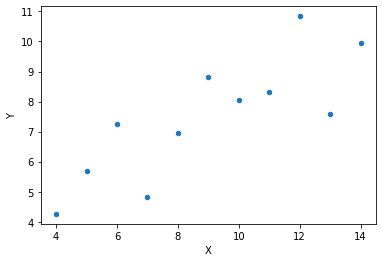

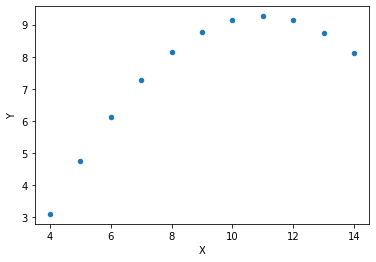

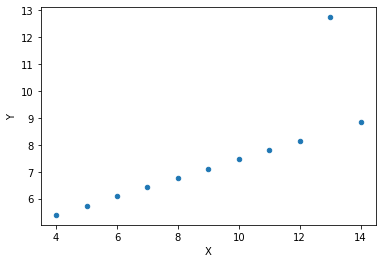

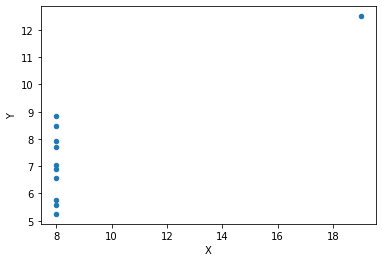

In [ ]:
#### ANSWERs
for n in series_names:
  sdat = dat.loc[dat.Series==n]
  sdat.plot.scatter("X","Y")

#Part 5.4 - Univariate Statistics (briefly) - *Mini-lecture*


# Part 5.5 - Describing data part 2 - *Workshop*

The Global Lakes and Wetlands Database (GLWD - https://www.worldwildlife.org/pages/global-lakes-and-wetlands-database) contains information on all lakes and reservoirs in the world with surface areas greater than 0.1 km2 (almost 250,000).
The dataset is split into two parts:

* Level 1 containing all lakes > 50 km2 in size with many attributes (area, elevation, location, geometry): https://github.com/ds4geo/ds4geo/blob/master/data/unordered/Global_Lakes_GLWD/glwd_1.csv (raw:https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/unordered/Global_Lakes_GLWD/glwd_1.csv)
* Level 2 containing all lakes >0.1 km2 (excluding those in level 1) with a limited set of attributes: https://github.com/ds4geo/ds4geo/blob/master/data/unordered/Global_Lakes_GLWD/glwd_2.csv (raw:https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/unordered/Global_Lakes_GLWD/glwd_2.csv)

Both original parts include polygon geometries, but these have been removed to reduce the file sizes.

Explore both datasets individually and together, and analyse and visualise the patterns in the data.

In [ ]:
import pandas as pd

In [ ]:
# ANSWERS
glwd1 = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/unordered/Global_Lakes_GLWD/glwd_1.csv")
glwd2 = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/unordered/Global_Lakes_GLWD/glwd_2.csv")

In [ ]:
#ANSWERS
glwd1

,GLWD_ID,TYPE,LAKE_NAME,DAM_NAME,POLY_SRC,AREA_SKM,PERIM_KM,LONG_DEG,LAT_DEG,ELEV_M,CATCH_TSKM,INFLOW_CMS,VOLUME_CKM,VOL_SRC,COUNTRY,SEC_CNTRY,RIVER,NEAR_CITY,MGLD_TYPE,MGLD_AREA,LRS_AREA,LRS_AR_SRC,LRS_CATCH,DAM_HEIGHT,DAM_YEAR,USE_1,USE_2,USE_3
0,1,Lake,Caspian Sea,NaN,ArcWorld,378119.3,6820.3,50.36,41.85,-22,3174.0,8644.8,NaN,NaN,Kazakhstan,"+4: Russia, Turkmenistan, Azerbaijan, Iran",NaN,NaN,closedx,380000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lake,Lake Superior,NaN,ArcWorld,81935.7,3469.6,-88.23,47.72,184,203.2,2115.8,NaN,NaN,Canada,United States,NaN,NaN,open,82000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lake,Lake Victoria,Owen Falls (Lake Victoria),DCW,67075.2,6041.4,33.23,-1.30,1140,257.9,1201.7,204.80,LRs,Tanzania,"+2: Uganda, Kenya",Nile,Jinta,open,68800.0,69000.0,Other,0.0,31.0,1954.0,i,h,NaN
3,4,Lake,Aral Sea,NaN,ArcWorld,65966.8,3580.4,60.08,45.13,42,255.5,27.4,NaN,NaN,Kazakhstan,Uzbekistan,NaN,NaN,closedx,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Lake,Lake Huron,NaN,ArcWorld,59756.5,3943.9,-82.21,44.78,176,486.8,4069.9,NaN,NaN,Canada,United States,NaN,NaN,open,59500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,3717,Reservoir,NaN,Swift,DCW,14.4,31.8,-122.11,46.06,292,1.3,61.2,0.93,ICOLD_LRs,United States,NaN,Lewis,Cougar,NaN,NaN,19.0,ICOLD,1246.0,186.0,1958.0,h,c,r
3717,3718,Reservoir,NaN,New Bullards Bar,DCW,13.0,37.1,-121.13,39.44,583,1.3,20.6,0.90,ICOLD,United States,NaN,N. Yuba,Marysville,NaN,NaN,19.0,ICOLD,0.0,194.0,1970.0,s,h,f
3718,3719,Reservoir,NaN,Callada,DCW,12.7,34.8,77.17,8.53,122,0.1,0.8,0.50,LRs,India,NaN,Callada,Trivandrum,NaN,NaN,51.0,LRs_cor,0.0,85.0,0.0,NaN,NaN,NaN
3719,3720,Reservoir,NaN,Lois(Scanlon),DCW,12.2,29.8,-124.41,49.92,208,0.1,1.8,0.56,ICOLD_LRs,Canada,NaN,Lois,Powell River,NaN,NaN,30.0,Statistics,0.0,64.0,1941.0,h,NaN,NaN


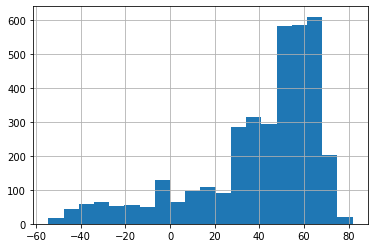

In [ ]:
#glwd1["ELEV_M"].hist(weights=glwd1["AREA_SKM"])#(hist_kws={'weights':df.wt.values})
#glwd1["ELEV_M"].hist()
glwd1["LAT_DEG"].hist(bins=20)

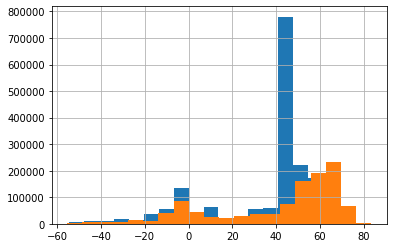

In [ ]:
glwd1["LAT_DEG"].hist(bins=20, weights=glwd1["AREA_SKM"])
glwd2["LAT_DEG"].hist(bins=20, weights=glwd2["AREA_SKM"])

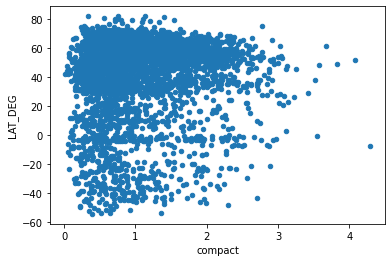

In [ ]:
glwd1["compact"] = glwd1["PERIM_KM"]/glwd1["AREA_SKM"]
glwd1.plot.scatter("compact","LAT_DEG")
# join the datasets to see impact of small lakes on above
# Also compactness measure

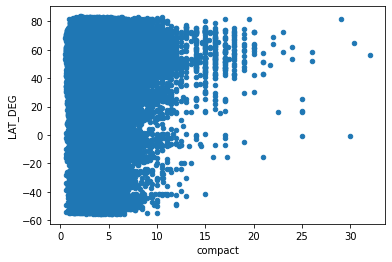

In [ ]:
glwd2["compact"] = glwd2["PERIM_KM"]/glwd2["AREA_SKM"]
glwd2.plot.scatter("compact","LAT_DEG")

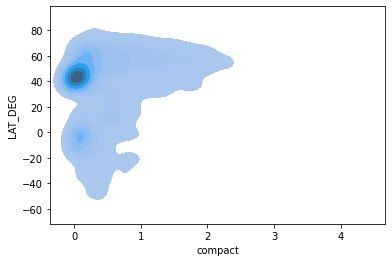

In [ ]:
import seaborn as sns
sns.kdeplot(data=glwd1, x="compact", y="LAT_DEG", fill=True, weights="AREA_SKM", bw_method=0.2)

# Part 5.6 - Data Story Telling - *Mini-lecture*

# Part 5.7 - "How do I do that?" Open Session - *Workshop/Discussion*
Open discussion and workshop on any python or data science topic of interest.

# Part 5.8 - Assignment
Now that you have more experience working with data, and telling stories with data, we return to the weather story telling assignment.

**Task**

Improve and expand your original assignment from Session 3. Your submission should be roughly twice the length of the original. Build upon the new content introduced in this session and feedback from your peers.

You can add more cities to your analysis using data from https://rp5.ru/ if you want a challenge, but you will need to do several pre-processing steps on the data to make it comparable to the data provided for the session 3 assignment.


**Submission**
* Submit the assignment here: https://github.com/ds4geo/ds4geo_ws2020/tree/master/Assignments/Session%203
* Create a new Colab notebook via Google Drive, then save it to the submission repository using "save a copy to GitHub". See here:
 * https://github.com/ds4geo/ds4geo/blob/master/Github%20Assignment%20Readme.md
* The **deadline** is 23:59 on 18th November 2020.
* This assignment comprises 5% of the assessment for the course. Marks are awarded for clear, effective and interesting data driven story telling.

Submitted notebooks will be made available to the whole class, and will be discussed in session 6.


#References

# **Data Science for Geoscientists - Winter Semester 2020**
# **Session 6 - Regressions - 11th November 2020**

Multivariate stats, regressions, curve fitting
Introduce main project

# Part 6.1 - Ice Breaker - *Discussion*

# Part 6.2 - Introduction to Regressions - *Mini-lecture*

# Part 6.3 - Linear Regression Excercise - *Workshop*



# Part 6.4 - Data Description Excercise - *Workshop*

# Part 6.5 - Robustness of Statistics - *Mini-lecture*

# Part 6.6 - Time Series Comparisons - *Mini-lecture*

# Part 6.7 - Time Series Comparisons Excercise - *Workshop*

# Part 6.8 - Open Time Series Workshop - *Workshop*

# Part 6.9 - Assignment